In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Deep Learning for Regression

In [3]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

data = load_diabetes()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(353, 10)

In [4]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
mdl.fit(X_train, y_train, epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 541us/step - loss: 29147.8887 - mape: 99.7319 
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 30201.1797 - mape: 98.2233
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 29373.3887 - mape: 96.2579
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 29356.0371 - mape: 93.6134
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 26628.0215 - mape: 90.0160
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - loss: 22421.6230 - mape: 84.1906
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - loss: 21725.1211 - mape: 78.0356
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - loss: 19564.1660 - mape: 70.3587
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 436us/step - loss: 15494.3232 - mape: 60.7395
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - loss: 11490.0078 - mape: 50.9119
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - loss: 8556.6797 - mape: 43.4818
Epoch 12/100
12/12 ━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


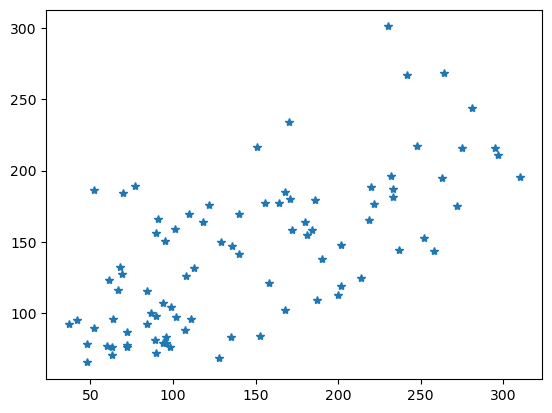

In [5]:
ypred = mdl.predict(X_test)
plt.plot(y_test, ypred, "*")

In [6]:
mdl.evaluate(X_test,y_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 3079.7844 - mape: 36.7648


[2885.673095703125, 36.95295333862305]

In [7]:
ypred = mdl.predict(X_test)
ypred[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step


array([[165.33784 ],
       [184.07108 ],
       [147.37283 ],
       [301.34058 ],
       [ 95.615456]], dtype=float32)

## Deep Learning for Binary Classification

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
data.keys()
#print(data["DESCR"])

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape)

(455, 30)


In [26]:
model = keras.Sequential()

model.add(layers.Input(shape=(X_train.shape[1], )))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

model.compile(optimizer="adam", loss = "binary_crossentropy", metrics = ["accuracy"])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.8837 - loss: 0.4554
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.9452 - loss: 0.1829
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9644 - loss: 0.1064
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.9825 - loss: 0.0816
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 425us/step - accuracy: 0.9838 - loss: 0.0617
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.9826 - loss: 0.0573
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.9907 - loss: 0.0466
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step - accuracy: 0.9944 - loss: 0.0344
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.9888 - loss: 0.0576
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9922 - loss: 0.0381
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.9947 - loss: 0.0316
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0

In [29]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - accuracy: 0.9794 - loss: 0.2123


[0.15406852960586548, 0.9824561476707458]

In [30]:
ypred = model.predict(X_test)
ypred_label = (ypred > 0.5).astype("int")
ypred_label[:5]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[1],
       [0],
       [0],
       [1],
       [1]])

## Deep Learning for Multinomial Classification



In [31]:
from sklearn.datasets import load_iris

data = load_iris()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(120, 4)

In [32]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(3, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.5531 - loss: 1.0616
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - accuracy: 0.6879 - loss: 0.9336
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 633us/step - accuracy: 0.7925 - loss: 0.8261
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step - accuracy: 0.7890 - loss: 0.7540
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - accuracy: 0.8046 - loss: 0.6556
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - accuracy: 0.8123 - loss: 0.5822
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/step - accuracy: 0.8435 - loss: 0.5065
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - accuracy: 0.8467 - loss: 0.4243
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.8206 - loss: 0.4239
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.8302 - loss: 0.3882
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.8315 - loss: 0.3487
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy:

In [34]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)
print(ypred_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [35]:
mdl.evaluate(X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 1.0000 - loss: 0.0191


[0.01909266598522663, 1.0]

## Overfitting in Deep Learning

In [36]:
data = load_diabetes()

X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mu = X_train.mean(axis = 0)
sigma = X_train.std(axis = 0)

X_train = (X_train - mu) / sigma
X_test = (X_test - mu) / sigma
X_train.shape

(353, 10)

In [38]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(256, activation = "relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dropout(0.2))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience=30, restore_best_weights=True)

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mape"])
history = mdl.fit(X_train, y_train, epochs=1000, verbose = 0, validation_split=0.1, callbacks=[early_stop])

print("Train data: ", mdl.evaluate(X_train, y_train))
print("Test data: ", mdl.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 416us/step - loss: 2724.8425 - mape: 34.6176
Train data:  [2738.8115234375, 35.7525749206543]
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 3172.9143 - mape: 37.1071
Test data:  [2954.70654296875, 37.25604248046875]


(0.0, 98.68962860107422)

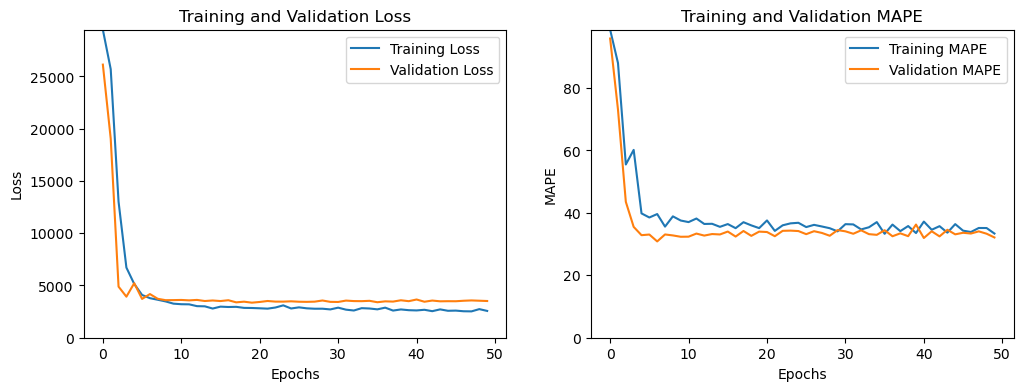

In [45]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")  
plt.title("Training and Validation Loss")
plt.legend()
plt.ylim([0, max(history.history["loss"] + history.history["val_loss"])]) 

plt.subplot(1,2,2)
plt.plot(history.history["mape"], label="Training MAPE")
plt.plot(history.history["val_mape"], label="Validation MAPE")
plt.xlabel("Epochs")
plt.ylabel("MAPE")  
plt.title("Training and Validation MAPE")
plt.legend()
plt.ylim([0, max(history.history["mape"] + history.history["val_mape"])])

## Multi Layer Perceptron for Image Analysis

In [76]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [77]:
X_train.shape

(60000, 28, 28)

In [78]:
labels = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [79]:
print(labels[y_train[0]])

Ankle boot


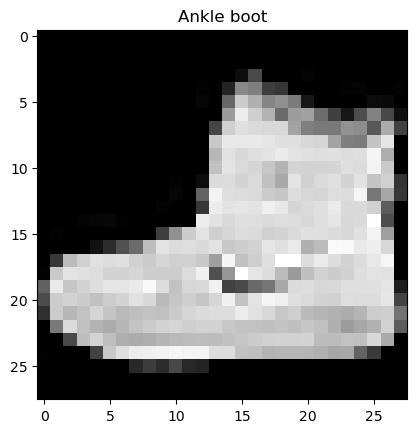

In [80]:
plt.imshow(X_train[0], cmap="gray")
plt.title(labels[y_train[0]])
plt.show()

In [51]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
#Normalize Data
X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(60000, 784)


In [58]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.7772 - loss: 0.6325
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 605us/step - accuracy: 0.8612 - loss: 0.3765
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 630us/step - accuracy: 0.8789 - loss: 0.3322
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - accuracy: 0.8889 - loss: 0.3047
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.8938 - loss: 0.2863
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.8976 - loss: 0.2730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.9008 - loss: 0.2638
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.9059 - loss: 0.2523
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 681us/step - accuracy: 0.9083 - loss: 0.2427
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 609us/step - accuracy: 0.9130 - loss: 0.2344


In [59]:
mdl.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.8844 - loss: 0.3460


[0.3364301025867462, 0.883899986743927]

In [60]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


5


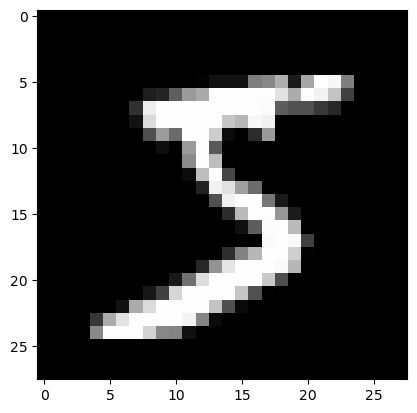

In [62]:
plt.imshow(X_train[0], "gray")
print(y_train[0])

In [65]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0
print(X_train.shape)

(60000, 784)


In [73]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1], )))
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.6002 - loss: 1.2892
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.8819 - loss: 0.4060
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9003 - loss: 0.3441
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.9112 - loss: 0.3077
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 587us/step - accuracy: 0.9170 - loss: 0.2808
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 600us/step - accuracy: 0.9259 - loss: 0.2567
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 608us/step - accuracy: 0.9325 - loss: 0.2278
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - accuracy: 0.9389 - loss: 0.2096
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9435 - loss: 0.1940
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - accuracy: 0.9475 - loss: 0.1763


In [74]:
mdl.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step - accuracy: 0.9427 - loss: 0.2016


[0.17978031933307648, 0.9491999745368958]

## Convolutional Neural Networks

In [81]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()


X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28, 1)

In [82]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=X_train.shape[1:]))
mdl.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
mdl.add(layers.MaxPool2D(pool_size=(2,2)))
mdl.add(layers.Conv2D(64, kernel_size = (3,3), activation="relu" ))
mdl.add(layers.MaxPool2D(pool_size=(2,2)))
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

Epoch 1/10


/Users/baris/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.7604 - loss: 0.6409
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8842 - loss: 0.3134
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9022 - loss: 0.2606
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9163 - loss: 0.2253
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9254 - loss: 0.1953
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9332 - loss: 0.1749
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9408 - loss: 0.1533
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9494 - loss: 0.1340
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9548 - loss: 0.1192
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9570 - loss: 0.1089


In [83]:
mdl.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9118 - loss: 0.3200


[0.3135792911052704, 0.9139000177383423]

In [87]:
y_pred = mdl.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)
y_pred_label[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([9, 2, 1, 1, 6])

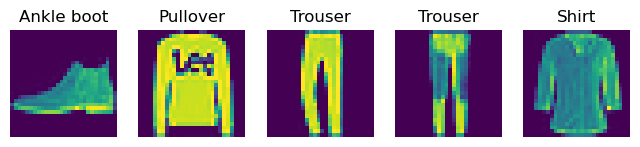

In [90]:
plt.figure(figsize=(8, 4))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(labels[y_test[i]])
    plt.axis("off")

Text(0.5, 1.0, 'Prediction Probabilities')

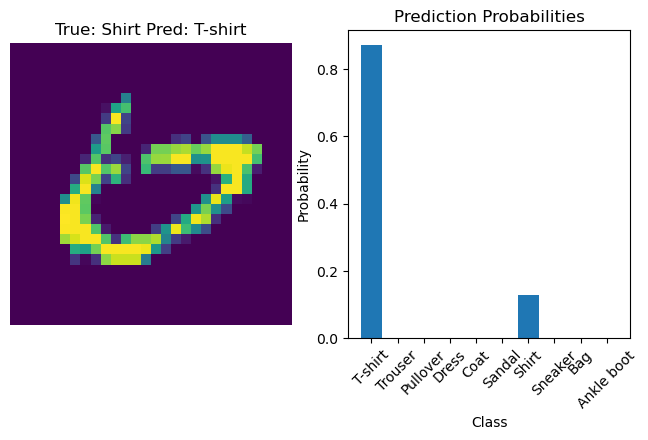

In [146]:
plt.figure(figsize=(8, 4))

ix = (y_test != y_pred_label)
k = 3

plt.subplot(1, 2, 1)
plt.imshow(X_test[ix][k].reshape(28, 28))
plt.title(f"True: {labels[y_test[ix][k]]} Pred: {labels[y_pred_label[ix][k]]}")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.bar(np.arange(10), y_pred[ix][k])
plt.xticks(ticks=np.arange(10), labels=labels, rotation=45)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Prediction Probabilities")

In [108]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

(60000, 28, 28, 1)

In [111]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=X_train.shape[1:]))
mdl.add(layers.Conv2D(128, kernel_size=(3,3), activation="relu"))
mdl.add(layers.MaxPool2D(pool_size=(2,2)))
mdl.add(layers.Conv2D(64, kernel_size=(3,3), activation="relu"))
mdl.add(layers.MaxPool2D(pool_size=(2,2)))
mdl.add(layers.Flatten())
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(64, activation = "relu"))
mdl.add(layers.Dense(10, activation = "softmax"))

mdl.compile(optimizer="adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9079 - loss: 0.2853
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9875 - loss: 0.0427
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9907 - loss: 0.0305
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9935 - loss: 0.0206
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9945 - loss: 0.0159
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9955 - loss: 0.0134
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9973 - loss: 0.0084
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9967 - loss: 0.0102
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9978 - loss: 0.0069
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9977 - loss: 0.0073


In [112]:
mdl.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9873 - loss: 0.0561


[0.04296157881617546, 0.9907000064849854]

In [132]:
y_pred = mdl.predict(X_test)
y_pred_label = np.argmax(y_pred, axis=1)
y_pred_label[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([7, 2, 1, 0, 4])

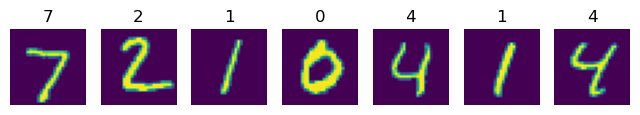

In [141]:
plt.figure(figsize=(8, 6))

for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.title(y_pred_label[i])
    plt.axis("off")

Text(0.5, 1.0, 'Prediction Probabilities')

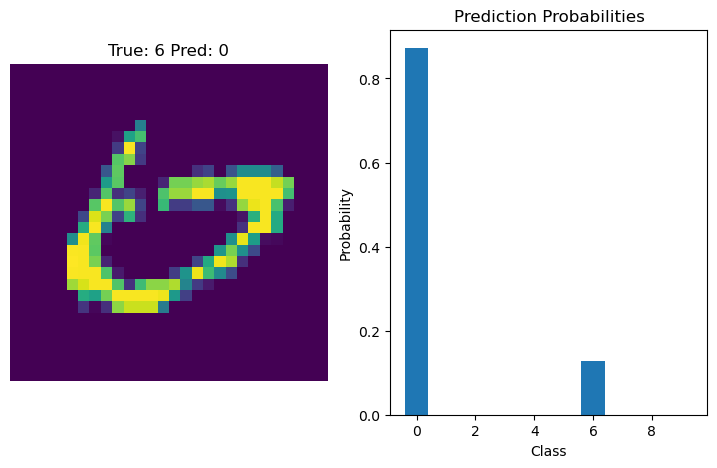

In [166]:
ix = y_pred_label != y_test

k = 3

plt.figure(figsize=(9, 5))

plt.subplot(1, 2, 1)
plt.imshow(X_test[ix][k].reshape(28, 28))
plt.title(f"True: {y_test[ix][k]} Pred: {y_pred_label[ix][k]}")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.bar(np.arange(10), y_pred[ix][k])
plt.xlabel("Class")
plt.ylabel("Probability")
plt.title("Prediction Probabilities")

In [187]:
from PIL import Image, ImageOps

test = Image.open("test1.png")
test = ImageOps.grayscale(test)
test = test.resize((28,28))
test_array = np.asarray(test)
plt.imshow(test_array, "gray")
test_array = test_array.reshape(1,28,28,1)
test_array = test_array / 255.0
labels[np.argmax(mdl.predict(test_array))]

FileNotFoundError: [Errno 2] No such file or directory: 'test1.png'

In [188]:
ypred = mdl.predict(X_test)
ypred_label = np.argmax(ypred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step


In [189]:
np.argmax(ypred, axis = 1)

array([586, 610, 745, ..., 744, 744, 469])

IndexError: list index out of range

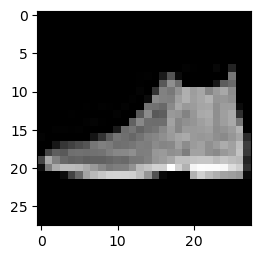

In [190]:
plt.figure(figsize = (16,8))

for i in range(10):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title(labels[ypred_label[i]])
    plt.axis("off")

# Recurrent Neural Network

In [121]:
df = pd.read_excel("data/natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


<Axes: >

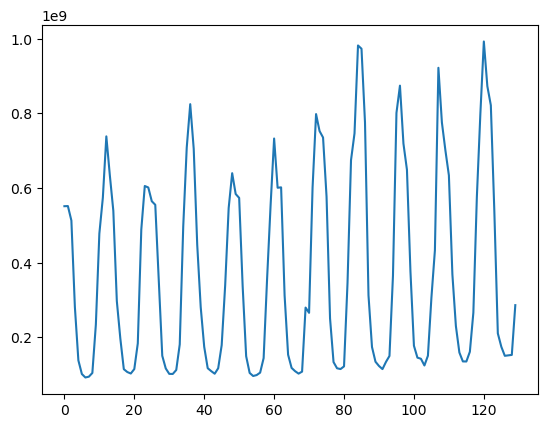

In [122]:
consumption = df["Consumption"]
consumption.plot()

In [123]:
mu = consumption[:-12].mean()
sigma = consumption[:-12].std()

consumption = (consumption - mu) / sigma
consumption

0      0.743564
1      0.744885
2      0.593894
3     -0.309972
4     -0.867340
         ...   
125   -0.725088
126   -0.819838
127   -0.814927
128   -0.810354
129   -0.290411
Name: Consumption, Length: 130, dtype: float64

In [124]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])

    return np.array(X), np.array(y)

X, y = make_data(consumption, lag = 12)
X = X[..., np.newaxis]
X.shape, y.shape

((118, 12, 1), (118,))

In [125]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

In [126]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=X_train.shape[1:]))

mdl.add(layers.LSTM(128))
mdl.add(layers.Dense(128, activation="relu"))
mdl.add(layers.Dense(1))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9604 - mae: 0.8706  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8831 - mae: 0.8128 
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6846 - mae: 0.7072 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4564 - mae: 0.5460 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2510 - mae: 0.3772 
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2065 - mae: 0.3573 
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1807 - mae: 0.3405 
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1222 - mae: 0.2741 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1269 - mae: 0.2721 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1190 - mae: 0.2599 
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1017 - mae: 0.2405 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0989 - mae: 0.2333 
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/ste

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


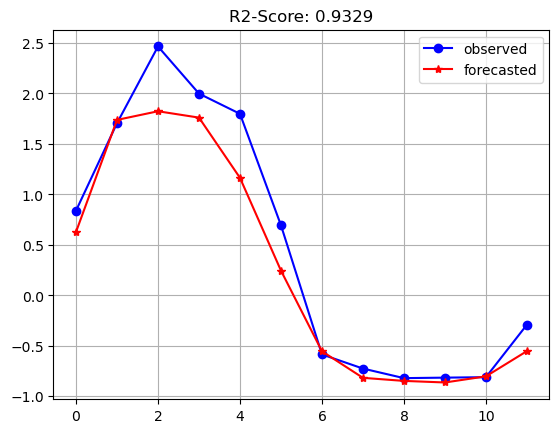

In [127]:
y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "observed")
plt.plot(y_pred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

plt.show()

## LSTM with Machine Learning

In [128]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data[i:i+lag])
        y.append(data[i+lag])

    return np.array(X), np.array(y)

X, y = make_data(consumption, lag = 12)
X.shape, y.shape

((118, 12), (118,))

In [130]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

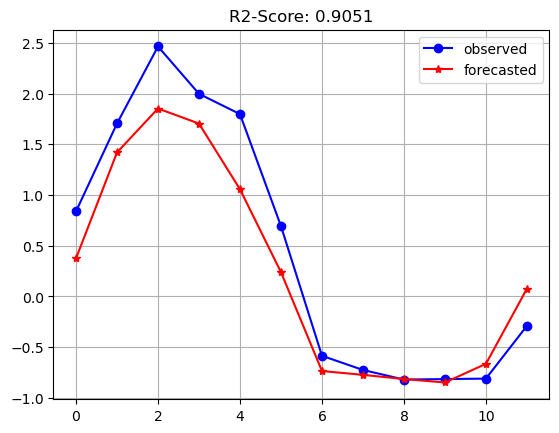

In [131]:
from sklearn.ensemble import GradientBoostingRegressor

mdl = GradientBoostingRegressor()
mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "observed")
plt.plot(y_pred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

plt.show()

#  Multivariate LSTM Forecasting

In [132]:
df = pd.read_excel("data/natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [133]:
mu = df.iloc[:-12].mean()
sigma = df.iloc[:-12].std()

df = (df - mu) / sigma
df

,Consumption,Temperature
0,0.743564,-1.237245
1,0.744885,-1.359303
2,0.593894,-1.170495
3,-0.309972,-0.433719
4,-0.867340,0.209014
...,...,...
125,-0.725088,0.858421
126,-0.819838,1.432771
127,-0.814927,1.610772
128,-0.810354,1.161913


In [135]:
def prep_data(data, lag = 3, target_col = 0):
  X = []
  y = []

  for i in range(len(data) - lag):
    X.append(data[i:i+lag])
    y.append(data[i+lag, target_col])

  return np.array(X), np.array(y)

X, y = prep_data(df.values, lag = 12, target_col = 0)
X.shape, y.shape

((118, 12, 2), (118,))

In [136]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


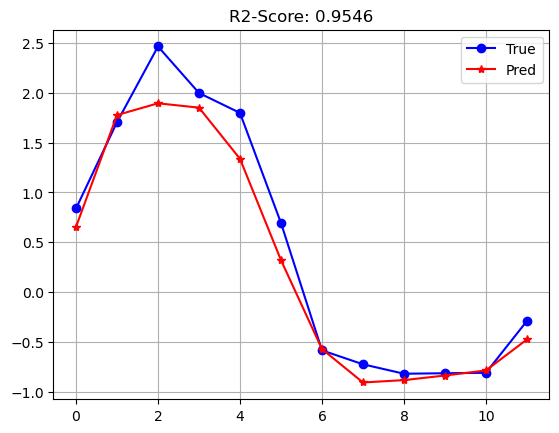

In [137]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1:])))
mdl.add(layers.LSTM(128))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(1, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "True")
plt.plot(y_pred, "-*r", label = "Pred")
plt.legend()
plt.grid()
plt.show()

# Multivariate LSTM with Machine Learning

In [138]:
def make_data(data, lag=3, target='Consumption'):
    X = []
    y = []
    for i in range(len(data)-lag):
        X.append(data.iloc[i:i+lag].values.ravel())
        y.append(data.loc[i+lag, target])

    return np.array(X), np.array(y)

X, y = make_data(df, lag = 12)
X.shape, y.shape

((118, 24), (118,))

In [139]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

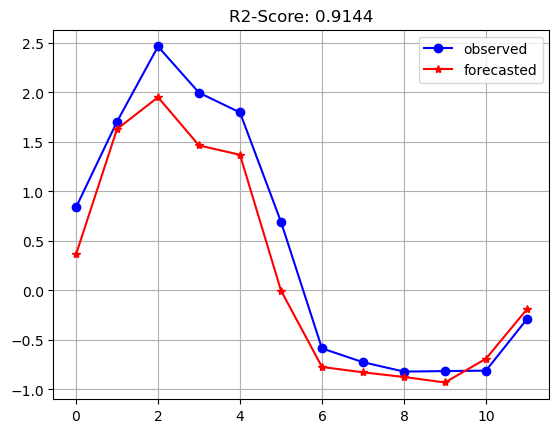

In [140]:
mdl = GradientBoostingRegressor(n_estimators=80, learning_rate=0.5)
mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)
r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "observed")
plt.plot(y_pred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

plt.show()

# Multivariate Multistep Estimation

## Deep Learning

In [141]:
def prep_data(data, lag = 3, period = 2, target_col = 0):
  X = []
  y = []

  for i in range(len(data) - lag - period + 1):
    X.append(data[i:i+lag])
    y.append(data[i+lag : i + lag + period, target_col])

  return np.array(X), np.array(y)

X, y = prep_data(df.values, lag = 12, target_col = 0, period = 12)
X.shape, y.shape

((107, 12, 2), (107, 12))

In [142]:
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


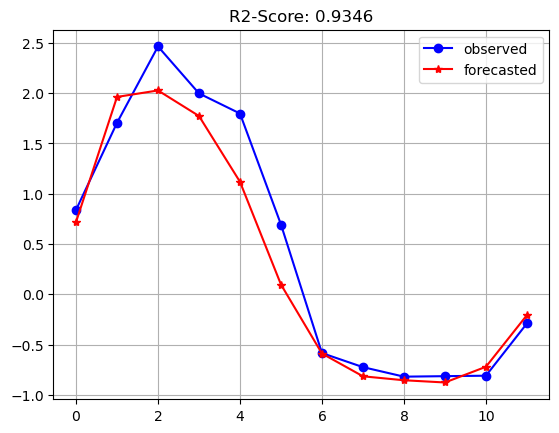

In [143]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1:])))
mdl.add(layers.LSTM(128))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(12, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

y_pred = mdl.predict(X_test)

y_pred = y_pred.ravel()
y_test = y_test.ravel()
r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "observed")
plt.plot(y_pred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

plt.show()

## Machine Learning

In [147]:
def prep_data(data, lag = 3, period = 2, target_col = 0):
  X = []
  y = []

  for i in range(len(data) - lag - period + 1):
    X.append(data[i:i+lag].ravel())
    y.append(data[i+lag: i + lag + period, target_col])

  return np.array(X), np.array(y)

X, y = prep_data(df.values, lag = 12, target_col = 0, period = 12)
X.shape, y.shape

((107, 24), (107, 12))

In [148]:
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

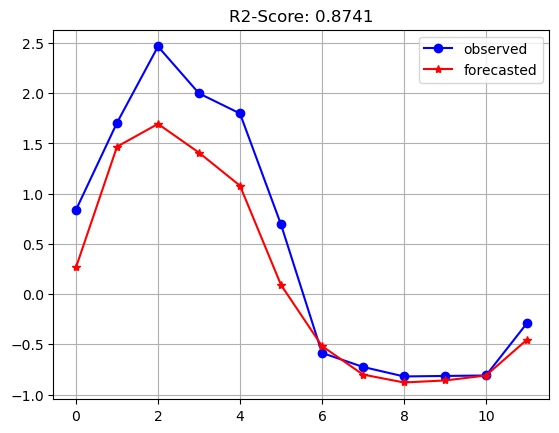

In [149]:
from sklearn.multioutput import MultiOutputRegressor

mdl = MultiOutputRegressor(GradientBoostingRegressor())
mdl.fit(X_train, y_train)

y_pred = mdl.predict(X_test)
y_pred = y_pred.ravel()
y_test = y_test.ravel()

r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "observed")
plt.plot(y_pred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

plt.show()

## Adding Time Features

In [150]:
time_index = pd.date_range("2004-01-01", periods = len(df), freq = "MS")
time_index

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01'],
              dtype='datetime64[ns]', length=130, freq='MS')

In [151]:
df = pd.read_excel("data/natural_gas.xlsx")
df["year"] = time_index.year
df["month"] = time_index.month.astype("str")
df = pd.get_dummies(df, drop_first = True, dtype = "int")
mu = df.iloc[:-12].mean()
sigma = df.iloc[:-12].std()

df = (df - mu) / sigma
df.head()

,Consumption,Temperature,year,month_10,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,0.743564,-1.237245,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
1,0.744885,-1.359303,-1.553427,-0.302998,-0.286128,-0.286128,3.272381,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
2,0.593894,-1.170495,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,3.272381,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
3,-0.309972,-0.433719,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,-0.302998,3.272381,-0.302998,-0.302998,-0.302998,-0.302998,-0.302998
4,-0.867340,0.209014,-1.553427,-0.302998,-0.286128,-0.286128,-0.302998,-0.302998,-0.302998,3.272381,-0.302998,-0.302998,-0.302998,-0.302998


In [152]:
def prep_data(data, lag = 3, period = 2, target_col = 0):
  X = []
  y = []

  for i in range(len(data) - lag - period + 1):
    X.append(data[i:i+lag])
    y.append(data[i+lag : i + lag + period, target_col])

  return np.array(X), np.array(y)

X, y = prep_data(df.values, lag = 12, target_col = 0, period = 12)
X.shape, y.shape

((107, 12, 14), (107, 12))

In [153]:
X_train = X[:-1]
y_train = y[:-1]
X_test = X[-1:]
y_test = y[-1:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


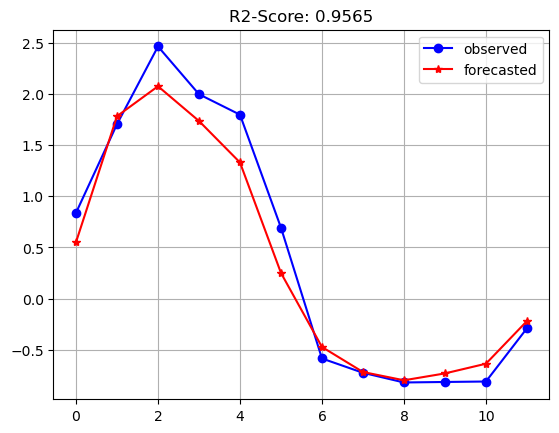

In [155]:
mdl = keras.Sequential()

mdl.add(layers.Input(shape=(X_train.shape[1:])))
mdl.add(layers.LSTM(128))
mdl.add(layers.Dense(128, activation = "relu"))
mdl.add(layers.Dense(12, activation = "linear"))

mdl.compile(optimizer = "adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, y_train, epochs = 30, verbose = 0)

y_pred = mdl.predict(X_test)
y_pred = y_pred.ravel()
y_test = y_test.ravel()

r2 = r2_score(y_test, y_pred)

plt.title(f"R2-Score: {r2:.4f}")
plt.plot(y_test, "-ob", label = "observed")
plt.plot(y_pred, "-*r", label = "forecasted")
plt.grid()
plt.legend()

plt.show()

In [179]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.shape

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


(60000, 784)

In [180]:
mdl = keras.Sequential()


mdl.add(layers.Dense(512, activation="relu", input_shape = (784, )))
mdl.add(layers.Dense(256, activation="relu"))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(28*28, activation="sigmoid"))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train, X_train, epochs=10)

/Users/baris/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0278 - mae: 0.0978
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0091 - mae: 0.0528
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0072 - mae: 0.0469
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0062 - mae: 0.0435
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0057 - mae: 0.0416
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0053 - mae: 0.0399
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0049 - mae: 0.0386
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0047 - mae: 0.0378
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0045 - mae: 0.0367
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0043 - mae: 0.0360


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step


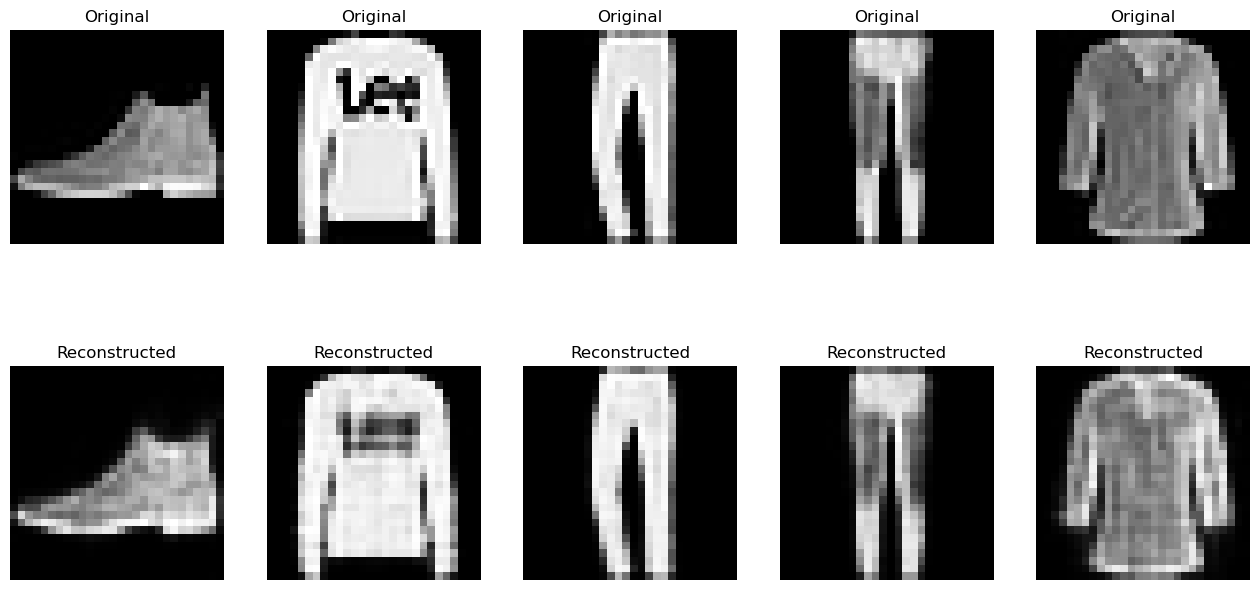

In [181]:
X_test_reconstructed = mdl.predict(X_test)

plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")

    plt.subplot(2,5, i + 5 + 1)
    plt.imshow(X_test_reconstructed[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")

In [182]:
noise_factor = 0.2

X_train_noisy = X_train + noise_factor * np.random.normal(size = X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(size = X_test.shape)

X_train_noisy = np.clip(X_train_noisy, 0,1)
X_test_noisy = np.clip(X_test_noisy, 0,1)

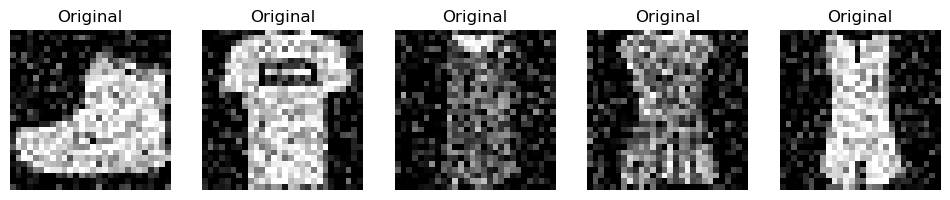

In [183]:
plt.figure(figsize = (12,6))

for i in range(5):
    plt.subplot(1,5, i + 1)
    plt.imshow(X_train_noisy[i].reshape(28,28), "gray")
    plt.title("Original")
    plt.axis("off")

In [184]:
mdl = keras.Sequential()


mdl.add(layers.Dense(512, activation="relu", input_shape = (784, )))
mdl.add(layers.Dense(256, activation="relu"))
mdl.add(layers.Dense(512, activation="relu"))
mdl.add(layers.Dense(28*28, activation="sigmoid"))

mdl.compile(optimizer="adam", loss = "mse", metrics = ["mae"])
mdl.fit(X_train_noisy, X_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0301 - mae: 0.1040
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0124 - mae: 0.0616
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0106 - mae: 0.0564
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0099 - mae: 0.0541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0094 - mae: 0.0524
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0090 - mae: 0.0511
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0088 - mae: 0.0503
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0086 - mae: 0.0497
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0084 - mae: 0.0491
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.0084 - mae: 0.0487


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step


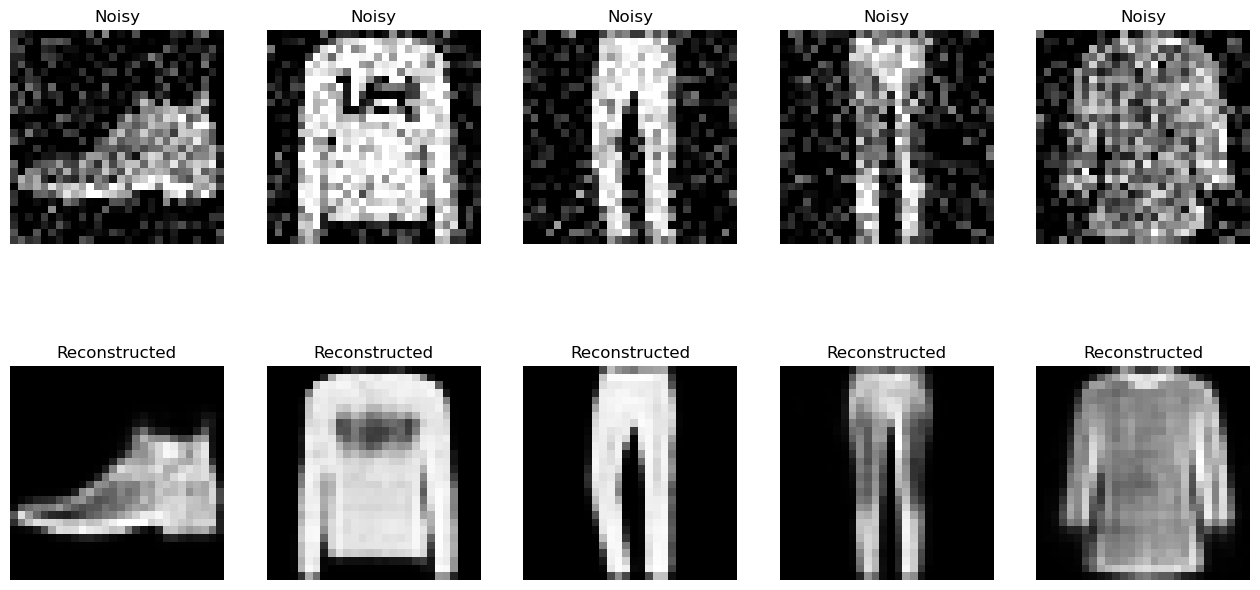

In [185]:
X_test_reconstructed = mdl.predict(X_test_noisy)

plt.figure(figsize = (16,8))

for i in range(5):
    plt.subplot(2,5, i + 1)
    plt.imshow(X_test_noisy[i].reshape(28,28), "gray")
    plt.title("Noisy")
    plt.axis("off")

    plt.subplot(2,5, i + 5 + 1)
    plt.imshow(X_test_reconstructed[i].reshape(28,28), "gray")
    plt.title("Reconstructed")
    plt.axis("off")